<a href="https://colab.research.google.com/github/IrisFDTD/PySciEng-UniDigital/blob/main/contenidos/TTyFTC_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Python en ciencias e ingeniería: tutoriales basados en ejemplos</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo y Adrián Navas Montilla</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

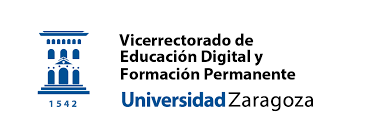

---
Producción de contenidos educativos digitales UNIZAR 2022-2023

**Objetos de aprendizaje abiertos del Vicerrectorado de Educación Digital y Formación Permanente de la Universidad de Zaragoza en el marco del Proyecto UniProducción incluido en el Plan UniDigital.**
---



## <center> Introducción a la termodinámica técnica con PyroMat </center>


-----------------------------------------

### Primer paso: cargar librerías de Python

Para comenzar, debemos cargar todos los paquetes de Python necesarios. Estos paquetes nos permiten hacer cosas como representaciones gráficas, operaciones matemáticas, trabajar con vectores... y hasta obtener las propiedades termodinámicas de distintas sustancias. Para esto último utilizaremos el paquete **PYroMat**. Dado que no es un paquete habitual, debemos instalarlo. Para instalar Pyromat y cargar el resto de paquetes, hacemos lo siguiente:

In [ ]:
import sys
!pip install pyromat
import pyromat as pm            # Importamos Pyromat
from sympy import *             # Librería para trabajo simbólico
import numpy as np              # Librería para cálculo numérico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

Si todo ha ido bien, se habrá instalado y habrá aparecido lo siguiente en la pantalla.

```Successfully installed pyromat-2.1.10```

### Breve introducción a Python

Antes de comenzar a resolver problemas de Termodinámica, vamos a aprender algunas operaciones básicas en Python:

In [ ]:
## Operaciones matemáticas

a = 2.0                         #para definir una variable hacemos simplemente esto
b = 3.3
c = a + b - 5.0*b/(a+b) + b**2   #almacenamos el resultado de esa operación en c

print("El resultado es", c)      #imprimimos por pantalla

El resultado es 13.076792452830187


In [ ]:
## Vectores y arrays

#  Voy a hacer un vector de 10 componentes que tomen valores entre 0 y 10

npt=10                       #numero de componentes del vector
x1=0.0                        #valor inicial
x2=10.0                       #valor final
v = np.linspace(x1, x2, npt)  #se construye un vector v con npt=10 valores entre 0 y 10, equiespaciados

print("El vector v es", v)      #imprimimos por pantalla

w=2*v                         #podemos hacer operaciones directamente con vectores! esto es muy útil

print("El vector w es", w)

El vector v es [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
El vector w es [ 0.          2.22222222  4.44444444  6.66666667  8.88888889 11.11111111
 13.33333333 15.55555556 17.77777778 20.        ]


In [ ]:
## Definición de funciones

#  Voy a definir la función polinómica f(x)=x**2+1

def mifuncion(x):       #defino la función con el nombre que yo quiera. Entre paréntesis van los argumentos de la función (de qué depende ésta)
    return x**2 + 1.0   #es la expresión de la función

print("La función evaluada en x=3 es", mifuncion(3.0))  #evaluo la función en x=3

print("La función evaluada en el vector x=v es", mifuncion(v)) #evaluo la función en todas las componentes de un vector

La función evaluada en x=3 es 10.0
La función evaluada en el vector x=v es [  1.           2.2345679    5.9382716   12.11111111  20.75308642
  31.86419753  45.44444444  61.49382716  80.01234568 101.        ]


Text(0, 0.5, 'y')

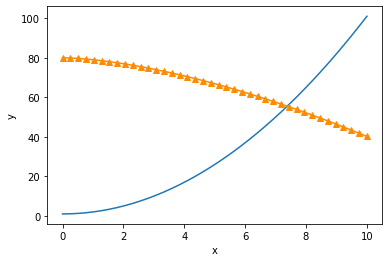

In [ ]:
## Representaciones gráficas

#  Vamos a representar gráficamente la función f(x)=x**2+1 del apartado anterior, definida en mifuncion(x)
#  Vamos a representar también la función f(x)=-x**1.6+80, que definiré sin usar una función (para que veais otra manera rápida de hacerlo)

npt=40                       #numero de puntos que voy a pintar
x1=0.0
x2=10.0
xx = np.linspace(x1, x2, npt) #defino los valores de x en un vector xx con 40 puntos entre x1 y x2
yy = mifuncion(xx)            #defino los valores de y en un vector yy evaluando las x anteriores con la función mifuncion(x)
yy2 = -xx**1.6 + 80            #defino los valores de y en un vector yy2 evaluando las x anteriores con la expresion -xx**1.6 + 80

fig, ax1 = plt.subplots(figsize=(6, 4)) #con esta intrucción creamos una figura "fig", con ejes llamados "ax1", de tamaño 6x4
ax1.plot(xx,yy)     #pinto yy frente a xx
ax1.plot(xx,yy2,'-^',color='darkorange')     #pinto yy2 frente a xx, añado triangulos en cada punto, además cambio el color a naranja
ax1.set_xlabel("x") #etiqueta del eje x
ax1.set_ylabel("y")  #etiqueta del eje y

### Introducción a PYroMat

PYroMat es un paquete de Python para obtener de manera sencilla las propiedades termodinámicas de las sustancias. PYroMat es gratuito y abierto.  Hay algunas alternativas excelentes que hacen cosas similares, pero todas ellas son con ánimo de lucro, tienen capacidades limitadas, se dedican a conjuntos de datos mucho más estrechos, o están construidas para realizar un trabajo específico. PYroMat está escrito completamente en Python y está diseñado con la intención de minimizar los clics y las pulsaciones de teclas necesarias para obtener datos que deberían estar disponibles para todos nosotros.

El texto anterior está extraido de la web del autor: http://pyromat.org/index.html




Para acceder a la configuración de PYroMat simplemente hacemos:

In [ ]:
pm.config

     config_file : ['C:\\Users\\sie2016\\anaconda3\\lib\\site-package...
  config_verbose : False
         dat_dir : ['C:\\Users\\sie2016\\anaconda3\\lib\\site-package...
 dat_exist_fatal : False
   dat_overwrite : True
   dat_recursive : True
     dat_verbose : False
           def_T : 298.15
         def_oob : nan
           def_p : 1.01325
   error_verbose : True
     install_dir : 'C:\\Users\\sie2016\\anaconda3\\lib\\site-packages...
         reg_dir : ['C:\\Users\\sie2016\\anaconda3\\lib\\site-package...
 reg_exist_fatal : False
   reg_overwrite : True
     reg_verbose : False
     unit_energy : 'kJ'
      unit_force : 'N'
     unit_length : 'm'
       unit_mass : 'kg'
     unit_matter : 'kg'
      unit_molar : 'kmol'
   unit_pressure : 'bar'
unit_temperature : 'K'
       unit_time : 's'
     unit_volume : 'm3'
         version : '2.2.4'
 warning_verbose : True

Aquí, entre otras cosas, podemos ver las unidades para las distintas propiedades. Esto es **muy importante**, ya que debemos saber en qué unidades estamos trabajando.

Entre ellas, debemos prestar atención a ```unit_matter```, que es la unidad de masa con la que se definirán las *propiedades específicas*. Es decir, si ```unit_matter: 'kg'```, obtendremos la energía específica en J/kg, mientras que si  ```unit_matter: 'g'```, la obtendremos en J/g.

Podemos modificar las unidades de alguna de estas propiedades. Por ejemplo, si queremos obtener la presión en kPa en vez de en bares, haremos:

In [ ]:
pm.config['unit_pressure'] = 'kPa'

Antes de empezar a obtener propiedades, debemos escoger la sustancia de la que queremos conocer sus propiedades y "cargar" sus datos. Para ello se utilizará el método ```pm.get('sustancia_de_la_lista')```.


La lista de sustancias está en: http://pyromat.org/features.html y se puede acceder a ella ejecutando ```pm.info()```.

Aquellas que comienzan por *ig* son gases ideales, mientras que aquellas que comienzan por *mp*, son sustancias multifásicas.

Vamos a cargar los datos del agua en un objeto al que llamamos ```water```:

In [ ]:
water = pm.get('mp.H2O')

De cada sustancia, podremos acceder a las siguientes propiedades:

- ```cp```: Calor específico a presión constante

- ```cv```: Calor específico a volumen constante

- ```d```: Densidad

- ```e```: Energía interna específica

- ```gam```: $\gamma$

- ```h```: Entalpía específica

- ```mw```: Masa molecular

- ```R```: Constante gas ideal

- ```s```: Entropía específica


Ahora, para acceder a las propiedades del agua simplemente utilizamos un "método" asociado al objeto ```water```. Por ejemplo, si queremos obtener la densidad del agua líquida a 15 ºC haremos:

In [ ]:
den=water.d(T=15+273.15, x=0.0) #pasamos como argumentos la temperatura y el título de la mezcla, en este caso x=0 agua liquida
print("La densidad del agua es:", den, "kg/m^3") # las unidades serán según estén definidas en unit_length y unit_mass.
                                                 # Si no me acuerdo, ejecuto pm.config

La densidad del agua es: [999.05268095] kg/m^3


Si queremos obtener la densidad del agua líquida a 120 kPa haremos:



In [ ]:
den=water.d(p=120, x=0.0) #pasamos como argumentos la presión y el título de la mezcla, en este caso x=0 agua liquida
print("La densidad del agua es:", den, "kg/m^3") # las unidades serán según estén definidas en unit_length y unit_mass.
                                                 # Si no me acuerdo, ejecuto pm.config

La densidad del agua es: [954.8629517] kg/m^3


Y si queremos obtener la energía interna específica, $u$, del vapor agua saturado a 120 kPa haremos:

In [ ]:
uw=water.e(p=120, x=1.0) #pasamos como argumentos la presión y el título de la mezcla, en este caso x=1 vapor
print("La energía interna específica:", uw, "kJ/kg")

La energía interna específica: [2511.67872698] kJ/kg


### Ejemplo sencillo

Un recipiente rígido contiene 20 kg de agua líquida saturada a 80 °C. Determine la presión en el recipiente y el volumen del mismo.

In [ ]:
#Primero configuramos unidades. Ponemos presion en kPa (por gusto) y el resto las dejamos como están
pm.config['unit_pressure'] = 'kPa'

#Ahora ponemos los datos del problema. Las unidades tienen que ser acordes a lo que aparece en pm.config
masa=20         #uds en kg (unit_mass)
temp=273.15+80  #uds en K (unit_temperature)

#Resolución
v=1/water.d(T=temp, x=0.0)  #volumen específico para x=0 (liquido saturado)
P=water.p(T=temp, x=0.0)    #presión para x=0 (liquido saturado)

V=v*masa #volumen total
print("El volumen total es:", V, "m^3")
print("La presión es:", P,"kPa")

El volumen total es: [0.0205812] m^3
La presión es: [47.41240781] kPa


## Resolución de ejercicios

### Ejercicio 1

Considere el proceso de evaporación de 800 gramos de agua líquida saturada, que se evapora por completo a una presión constante de 105 kPa. Determine:

a) el cambio de volumen en el proceso

b) la cantidad de energía transferida al agua

c) comprobar que $h_{fg}=u_{fg} + Pv_{fg}$.

In [ ]:
#Primero configuramos unidades
pm.config['unit_pressure'] = 'kPa'

#Ahora ponemos los datos del problema
masa=0.8         #uds en kg
Pres=105     #uds en kPa

#Resolución

#Apartado (a)
vf=1/water.d(p=Pres, x=0.0)  #volumen específico para x=0 (liquido saturado)
vg=1/water.d(p=Pres, x=1.0)  #volumen específico para x=0 (liquido saturado)

vfg = vg - vf # cambio de volumen durante el proceso evaporación

V=vfg*masa

print("vf=", vf, "m^3/kg , vg=", vg, "m^3/kg")
print("Cambio de volumen total:", V, "m^3")

#Apartado (b)
hf=water.h(p=Pres, x=0.0)
hg=water.h(p=Pres, x=1.0)

hfg = hg - hf #diferencia de entalpia entre ambos estados->entalpia de evaporacion

Hfg=hfg*masa

print("hfg=", hfg, "kJ/kg")
print("Energía total transferida al agua=", Hfg, "kJ")

#Apartado (c)
uf=water.e(p=Pres, x=0.0)
ug=water.e(p=Pres, x=1.0)

ufg = ug - uf #diferencia de energía interna entre ambos estados

hfg2 = ufg + Pres*vfg

Hfg2=hfg2*masa

print("hfg=", hfg2, "kJ/kg (Otra forma) ")
print("Energía total transferida al agua=", Hfg2, "kJ (Otra forma) ")

vf= [0.00104423] m^3/kg , vg= [1.61855827] m^3/kg
Cambio de volumen total: [1.29401123] m^3
hfg= [2253.85351315] kJ/kg
Energía total transferida al agua= [1803.08281052] kJ
hfg= [2253.86693465] kJ/kg (Otra forma) 
Energía total transferida al agua= [1803.09354772] kJ (Otra forma) 


### Ejercicio 2

Un recipiente rígido contiene 12 kg de agua a 90 °C. Si 8 kg del agua están
en forma líquida y el resto como vapor, determine:

 a) el título de la mezcla

 a) la presión en el recipiente

 b) el volumen del recipiente.

In [ ]:
#Primero configuramos unidades
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'kPa'

#Ahora ponemos los datos del problema
m=12        #uds en kg
mf=8
temp=273.15+90 # en K


#Resolución

#Apartado (a)

mg = m - mf
xt  = mg/m   #titulo mezcla

print("El título de la mezcla es:", xt)

P=water.p(T=temp, x=xt)

print("La presión es:", P,"kPa")


#Apartado (b)

vf=1/water.d(T=temp, x=0.0)  #volumen específico para x=0 (liquido saturado)
vg=1/water.d(T=temp, x=1.0)  #volumen específico para x=0 (liquido saturado)

vprom=(1-xt)*vf+xt*vg

vtot=vprom*m

print("El volumen es:", vtot,"m^3")

#Se puede calcular directamente el volumen específico dado el título de la mezcla!!!

vprom=1/water.d(T=temp, x=xt)

vtot=vprom*m

print("El volumen es:", vtot,"m^3 (Otra forma) ")


El título de la mezcla es: 0.3333333333333333
La presión es: [70.17611904] kPa
El volumen es: [9.445392] m^3
El volumen es: [9.445392] m^3 (Otra forma) 


### Ejercicio 3

El agua contenida en un dispositivo cilindro-pistón sufre dos procesos en serie desde un estado donde la presión inicial es 12 bar y la temperatura es 350°C:

- *Proceso 1-2*: El agua se enfría mientras es comprimida a presión constante hasta el estado de vapor saturado a 12 bar.

- *Proceso 2-3*: El agua se enfría a volumen constante hasta 150 °C.

a) Represente los estados 1, 2 y 3 sobre los diagramas T-v y P-v.

b) Determine el trabajo en kJ/kg, para el proceso completo.

c) Determine la transferencia de calor, en kJ/kg, para el proceso completo.


x es: [0.41435093]
w es: [-85.5480078]  kJ/kg
q es: [-1527.98446815]  kJ/kg


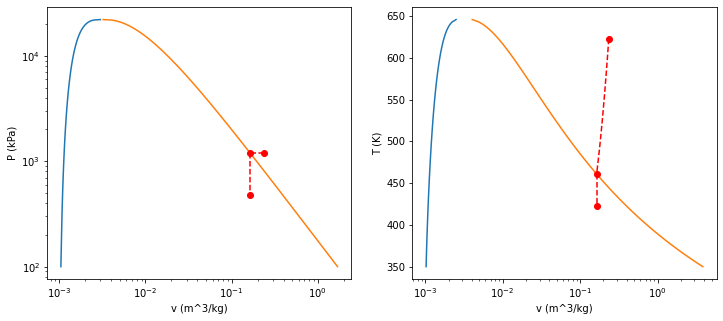

In [ ]:
#Primero configuramos unidades
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'kPa'

Pres = np.linspace(100.0, 22063.0, num=100) #Pcrit=22063 kPa
vline_f=1/water.d(p=Pres, x=0.0)
vline_g=1/water.d(p=Pres, x=1.0)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12, 5))
ax1.plot(vline_f,Pres,'-')
ax1.plot(vline_g,Pres,'-')
ax1.set_xlabel("v (m^3/kg)")
ax1.set_ylabel("P (kPa)")
ax1.set_xscale('log')
ax1.set_yscale('log')

Temp = np.linspace(350.0, 273.15+373, num=100) #Tcrit=373 K
vline_f=1/water.d(T=Temp, x=0.0)
vline_g=1/water.d(T=Temp, x=1.0)
ax2.plot(vline_f,Temp,'-')
ax2.plot(vline_g,Temp,'-')
ax2.set_xlabel("v (m^3/kg)")
ax2.set_ylabel("T (K)")
ax2.set_xscale('log')

P1=12*100 #kPa
T1=350+273.15 #K
v1=1/water.d(p=P1, T=T1)
ax1.plot(v1,P1,'or')
ax2.plot(v1,T1,'or')

P2=P1
v2=1/water.d(p=P2, x=1.0)
T2=water.T(p=P2, x=1)

P12 = np.linspace(P1, P2, num=20)
T12 = np.linspace(T1, T2, num=20)
v12 = 1/water.d(p=P1, T=T12)

ax1.plot(v2,P2,'or')
ax2.plot(v2,T2,'or')
ax2.plot(v12,T12,'--r')
ax1.plot(v12,P12,'--r')

T3=150+273.15
v3=v2
P3=water.p(T=T3, x=1)
ax1.plot(v3,P3,'or')
ax2.plot(v3,T3,'or')

P23 = np.linspace(P2, P3, num=20)
T23 = np.linspace(T2, T3, num=20)
v23 = np.linspace(v2, v3, num=20)
ax2.plot(v23,T23,'--r')
ax1.plot(v23,P23,'--r')

vf3= 1/water.d(T=T3,x=0.0)
vg3= 1/water.d(T=T3,x=1.0)

x3= (v3-vf3)/(vg3-vf3)

print("x es:", x3)

# Apartado b)

w = P1*(v2-v1)

print("w es:", w, " kJ/kg")

# Apartado c)

#q=u3-u1+w

u1  = water.e(T=T1,p=P1)

uf3 = water.e(T=T3,x=0.0)
ug3 = water.e(T=T3,x=1.0)
u3  = (1-x3)*uf3+x3*ug3

q  = u3-u1 + w

print("q es:", q, " kJ/kg")


